**Payment_of_Min_Amount**: Indicates whether the customer made the minimum payment.

**Credit_Mix**: The balance of different types of credit held by the customer. 

**Outstanding_Debt**: The total unpaid debt of the customer.  

**Credit_Score**: The customer's credit score (dependent variable).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Veri setini oku
df = pd.read_csv("train.csv")

# Kullanılacak sütunlar
selected_features = ["Payment_of_Min_Amount", "Credit_Mix", "Outstanding_Debt", "Credit_Score"]

# Gerekli sütunları seç
df = df[selected_features]


C:\Users\gundu\AppData\Local\Temp\ipykernel_3172\3179033133.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


In [3]:
df.head()

,Payment_of_Min_Amount,Credit_Mix,Outstanding_Debt,Credit_Score
0,No,_,809.98,Good
1,No,Good,809.98,Good
2,No,Good,809.98,Good
3,No,Good,809.98,Good
4,No,Good,809.98,Good


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Payment_of_Min_Amount  100000 non-null  object
 1   Credit_Mix             100000 non-null  object
 2   Outstanding_Debt       100000 non-null  object
 3   Credit_Score           100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB



Eksik Değerler:
Payment_of_Min_Amount    0
Credit_Mix               0
Outstanding_Debt         0
Credit_Score             0
dtype: int64


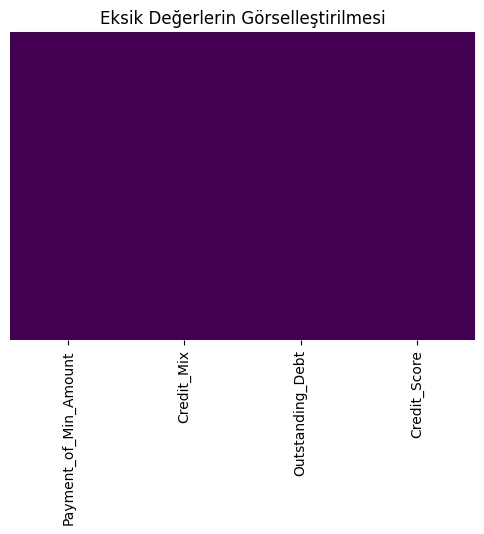

In [12]:
# 3. EKSİK DEĞER ANALİZİ
print("\nEksik Değerler:")
print(df.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Eksik Değerlerin Görselleştirilmesi")
plt.show()

Payment_of_Min_Amount

In [17]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [18]:
# NM değerlerini No ile değiştirme
df["Payment_of_Min_Amount"].replace("NM", "No", inplace=True)


In [19]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'Yes'], dtype=object)

Credit_Mix	

In [21]:
df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [22]:
# "_" değerinin kaç kez geçtiğini kontrol etme
underscore_count = (df["Credit_Mix"] == "_").sum()
print(f'"_" değeri toplam {underscore_count} kez geçiyor.')


"_" değeri toplam 20195 kez geçiyor.


In [23]:
# "_" değerine sahip satırları veri setinden kaldırma
df = df[df["Credit_Mix"] != "_"]


In [24]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 79805 entries, 1 to 99999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Payment_of_Min_Amount  79805 non-null  object
 1   Credit_Mix             79805 non-null  object
 2   Outstanding_Debt       79805 non-null  object
 3   Credit_Score           79805 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


Outstanding_Debt 

In [29]:
df["Outstanding_Debt"].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      shape=(12981,), dtype=object)

In [31]:
import re

# Sayısal olmayan karakterleri kaldırarak sütunu düzeltme
df["Outstanding_Debt"] = df["Outstanding_Debt"].apply(lambda x: re.sub(r"[^0-9.]", "", str(x)))

# Sütunu tekrar sayısal formata çevirme
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors='coerce')


In [32]:
df["Outstanding_Debt"].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38],
      shape=(12203,))

In [33]:
# Sütunu tekrar sayısal (float) formata çevirme
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors='coerce')

Credit_Score 

In [35]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79805 entries, 1 to 99999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Payment_of_Min_Amount  79805 non-null  object 
 1   Credit_Mix             79805 non-null  object 
 2   Outstanding_Debt       79805 non-null  float64
 3   Credit_Score           79805 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [37]:
# Label Encoding işlemini mapping ile gerçekleştirme

# Mapping sözlüklerini tanımlama
payment_mapping = {"No": 0, "Yes": 1}
credit_mix_mapping = {"Unknown": 0, "Bad": 1, "Standard": 2, "Good": 3}
credit_score_mapping = {"Poor": 0, "Standard": 1, "Good": 2}

# Mapping işlemini uygulama
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].map(payment_mapping)
df["Credit_Mix"] = df["Credit_Mix"].map(credit_mix_mapping)
df["Credit_Score"] = df["Credit_Score"].map(credit_score_mapping)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79805 entries, 1 to 99999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Payment_of_Min_Amount  79805 non-null  int64  
 1   Credit_Mix             79805 non-null  int64  
 2   Outstanding_Debt       79805 non-null  float64
 3   Credit_Score           79805 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.0 MB


# Modeling

XGBoost

In [53]:
X = df .drop("Credit_Score", axis = 1)
y = df["Credit_Score"]

In [54]:
X.head()

,Payment_of_Min_Amount,Credit_Mix,Outstanding_Debt
1,0,3,809.98
2,0,3,809.98
3,0,3,809.98
4,0,3,809.98
5,0,3,809.98


In [56]:
y.head()

1    2
2    2
3    2
4    2
5    2
Name: Credit_Score, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

# Varsayalım ki X ve y özelliklerinizi ve hedef değişkeninizi temsil ediyor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)


In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [61]:
from sklearn.metrics import confusion_matrix

eval_metric(xgb, X_train, y_train, X_test, y_test)


Test_Set
[[2020  989  460]
 [ 987 4344 1040]
 [  39  554 1538]]
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      3469
           1       0.74      0.68      0.71      6371
           2       0.51      0.72      0.60      2131

    accuracy                           0.66     11971
   macro avg       0.64      0.66      0.64     11971
weighted avg       0.68      0.66      0.66     11971


Train_Set
[[11571  5428  2661]
 [ 5268 24962  5869]
 [  186  2945  8944]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63     19660
           1       0.75      0.69      0.72     36099
           2       0.51      0.74      0.61     12075

    accuracy                           0.67     67834
   macro avg       0.65      0.67      0.65     67834
weighted avg       0.69      0.67      0.67     67834



In [66]:
param_grid = {
    "n_estimators": [100, 256, 512],  # Ağaç sayısı
    "max_depth": [5, 7, 9],  # Karar ağaçlarının maksimum derinliği
    "learning_rate": [0.05, 0.1, 0.2],  # Öğrenme oranı
    "subsample": [0.8, 1.0],  # Örnekleme oranı
    "colsample_bytree": [0.8, 1.0],  # Ağaç başına değişken seçimi
    "gamma": [0, 0.1, 0.3],  # Budama parametresi
    "min_child_weight": [1, 3]  # Yaprak düğüm başına minimum örnek
}


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

random_search = RandomizedSearchCV(
    xgb, param_distributions=param_grid, 
    n_iter=20, scoring='f1_weighted', 
    cv=3, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [5, 7, 9],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 256, 512],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [68]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [69]:
from sklearn.metrics import confusion_matrix

eval_metric(random_search, X_train, y_train, X_test, y_test)


Test_Set
[[1997  960  512]
 [ 963 4238 1170]
 [  39  431 1661]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      3469
           1       0.75      0.67      0.71      6371
           2       0.50      0.78      0.61      2131

    accuracy                           0.66     11971
   macro avg       0.64      0.67      0.64     11971
weighted avg       0.68      0.66      0.66     11971


Train_Set
[[11443  5246  2971]
 [ 5159 24340  6600]
 [  181  2329  9565]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.63     19660
           1       0.76      0.67      0.72     36099
           2       0.50      0.79      0.61     12075

    accuracy                           0.67     67834
   macro avg       0.65      0.68      0.65     67834
weighted avg       0.69      0.67      0.67     67834



In [70]:
import pickle

# Modeli kaydet
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(random_search.best_estimator_, f)


In [72]:
X.columns

Index(['Payment_of_Min_Amount', 'Credit_Mix', 'Outstanding_Debt'], dtype='object')

**Example 1:**

Payment_of_Min_Amount: Yes (1)

Credit_Mix: Good (3)

Outstanding_Debt: 15.7

Expected Credit_Score: Good (2)

**Example 2:**

Payment_of_Min_Amount: No (0)

Credit_Mix: Bad (1)

Outstanding_Debt: 78.3

Expected Credit_Score: Poor (0)

**Example 3:**

Payment_of_Min_Amount: Yes (1)

Credit_Mix: Standard (2)

Outstanding_Debt: 42.5

Expected Credit_Score: Standard (1)

**Example 4:**

Payment_of_Min_Amount: No (0)

Credit_Mix: Unknown (0)

Outstanding_Debt: 65.9

Expected Credit_Score: Poor (0)

**Example 5:**

Payment_of_Min_Amount: Yes (1)

Credit_Mix: Good (3)

Outstanding_Debt: 28.4

Expected Credit_Score: Good (2)